# Programmer-defined types

We have used many of Julia’s built-in types; now we are going to define a new type. As an example, we will create a type called `Point` that represents a point in two-dimensional space.

In mathematical notation, points are often written in parentheses with a comma separating the coordinates. For example, $(0,0)$ represents the origin, and $(x,y)$ represents the point $x$ units to the right and $y$ units up from the origin.

There are several ways we might represent points in Julia:

- We could store the coordinates separately in two variables, `x` and `y`.

- We could store the coordinates as elements in a list or tuple.

- We could create a new type to represent points as objects.

Creating a new type is more complicated than the other options, but it has advantages that will be apparent soon.

A programmer-defined composite type is also called a *struct*. A `struct` definition looks like this:

In [1]:
struct Point 
    x :: Float64
    y :: Float64
end

The header indicates that the new struct is called `Point`. The body defines the *attributes* or *fields* of the struct. The `Point` struct has two fields. The fields can optionally be annotated with types using the `::` operator. Fields with no type annotation default to `Any`, and can accordingly hold any type of value.

A struct is like a factory for creating objects. To create a `Point`, you call `Point` as if it were a function having as arguments the values of the attributes. When `Point` is used as a function, it is called a *constructor*.

In [2]:
origine = Point(0.0, 0.0)
println(origine)
typeof(origine)

Point(0.0, 0.0)


Point

The return value is a `Point` object, which we assign to `origine`. 

When you print an object, Julia tells you by default what type it belongs to and what the value of its fields are.

A state diagram that shows an object and its attributes is called an *object diagram*:

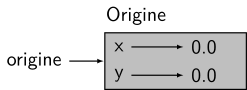

In [10]:
using TikzPictures
TikzPicture(L"""
    \node(origine) [draw, fill=lightgray, minimum width=2.5cm, minimum height=1cm]{};
    \node(norigine)[left of = origine, xshift=-1.5cm]{origine};
    \node(Origine)[above of = origine, xshift=-0.7cm, , yshift=-0.2cm]{Origine};
    \draw[-latex] (norigine) -- (origine);
    \node(nx) at(-1,0.25) {x};
    \node(x) at(0.5,0.25) {0.0};
    \draw[-latex](nx)--(x);
    \node(ny) at(-1,-0.25) {y};
    \node(y) at(0.5,-0.25) {0.0};
    \draw[-latex](ny)--(y);
"""; options="very thick, scale=2, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
    \\usepackage{cancel}
""")

# Structs are immutable

To get the values of the fields of a struct, `.` notation is used:

In [3]:
x = origine.x

0.0

The expression `origine.x` means, “Go to the object `origine` refers to and get the value of `x`.” In the example, we assign that value to a variable named `x`. There is no conflict between the variable `x` and the attribute `x`.

Structs are however immutable, after construction the fields can not change value:

In [4]:
origine.y = 1.0

LoadError: [91mtype Point is immutable[39m

This may seem odd at first, but it has several advantages:

- It can be more efficient.

- It is not possible to violate the invariants provided by the type's constructors.

- Code using immutable objects can be easier to reason about.

An immutable composite object might contain mutable objects, such as arrays, as fields. Those contained objects will remain mutable; only the fields of the immutable object itself cannot be changed to point to different objects.

In [5]:
struct APoint
    v :: Array{Float64, 1}
end

The struct `APoint` has one field that has type `Array{Float64, 1}`, i.e. an array of 1 dimension holding floating point values.

In [6]:
a_point = APoint([0.0, 0.0])

APoint([0.0, 0.0])

`a_point` is an immutable object but we can modify the values stored in `a_point.v`:

In [7]:
a_point.v[2] = 1.0
a_point

APoint([0.0, 1.0])

But we cannot reassign the field `v`:

In [8]:
a_point.v = [1.0, 1.0]

LoadError: [91mtype APoint is immutable[39m

# Rectangles

Sometimes it is obvious what the fields of an object should be, but other times you have to make decisions. For example, imagine you are designing a class to represent rectangles. What attributes would you use to specify the location and size of a rectangle? You can ignore angle; to keep things simple, assume that the rectangle is either vertical or horizontal.

There are at least two possibilities:

- You could specify one corner of the rectangle (or the center), the width, and the height.

- You could specify two opposing corners.

At this point it is hard to say whether either is better than the other, so we’ll implement the first one, just as an example.

Where required, mutable composite objects can be declared with the keyword `mutable struct`. Here is the definition of a mutable `Rectangle`:

In [9]:
mutable struct Rectangle
    width :: Number
    height :: Number
    corner :: Point
end

`width` and `height` are numbers; `corner` is a `Point` object that specifies the lower-left corner. We can create a `Box` object:

In [10]:
box = Rectangle(100, 200, Point(0.0, 0.0))

Rectangle(100, 200, Point(0.0, 0.0))

We have *embedded* a `Point` type inside a `Rectangle` type.

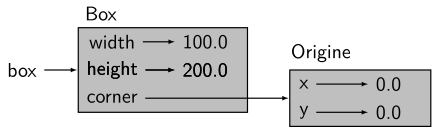

In [39]:
using TikzPictures
TikzPicture(L"""
    \node(box)[draw, fill=lightgray, minimum width=3cm, minimum height=1.5cm]{};
    \node(nbox)[left of = box, xshift=-1.5cm]{box};
    \node(Box)[above of = box, xshift=-1.1cm]{Box};
    \draw[-latex] (nbox) -- (box);
    \node(nw) at(-0.9,0.5) {width};
    \node(w) at(0.75,0.5) {100.0};
    \draw[-latex](nw)--(w);
    \node(nh) at(-0.9,0) {height};
    \node(h) at(0.75,0) {200.0};
    \draw[-latex](nh)--(h);
    \node(nc) at(-0.9,-0.5) {corner};
    \node(origine) [draw, fill=lightgray, minimum width=2.5cm, minimum height=1cm] at (3.5, -0.5){};
    \node(Origine)[above of = origine, xshift=-0.7cm, , yshift=-0.2cm]{Origine};
    \draw[-latex] (nc) -- (origine);
    \node(nx) at(2.5,-0.25) {x};
    \node(x) at(4,-.25) {0.0};
    \draw[-latex](nx)--(x);
    \node(ny) at(2.5,-0.75) {y};
    \node(y) at(4,-.75) {0.0};
    \draw[-latex](ny)--(y);
    \node(nh) at(-0.9,0) {height};
    \node(h) at(0.75,0) {200.0};
    \draw[-latex](nh)--(h);
"""; options="very thick, scale=2, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
    \\usepackage{cancel}
""")

To find the x-coordinate of the left corner fo the `box`, we can use two times the `.` notation:

In [11]:
box.corner.x

0.0

# Objects as Function arguments

You can pass an object as an argument in the usual way. For example:

In [12]:
function printPoint(p)
    println("($(p.x), $(p.y))")
end
printPoint(origine)

(0.0, 0.0)


`print_point` takes a point as an argument and displays it in mathematical notation.

Inside the function, `p` is an alias for `origine`. 

You can change the state of an mutable object by making an assignment to one of its fields. For example, to change the size of a rectangle without changing its position, you can modify the values of `width` and `height`:

In [13]:
box.width = box.width + 50
box.height = box.height + 100
box

Rectangle(150, 300, Point(0.0, 0.0))

You can also write functions that modify mutable objects. For example, `grow_rectangle` takes a `Rectangle` object and two numbers, dwidth and dheight, and adds the numbers to the width and height of the rectangle:

In [14]:
function grow_rectangle(rect::Rectangle, dwidth, dheight)
    rect.width += dwidth
    rect.height += dheight
end

grow_rectangle (generic function with 1 method)

Here is an example that demonstrates the effect:

In [15]:
grow_rectangle(box, 50, 100)
box

Rectangle(200, 400, Point(0.0, 0.0))

Inside the function, `rect` is an alias for `box`, so when the function modifies `rect`, `box` changes.

# Objects as return values

Functions can return objects. For example, `find_center` takes a `Rectangle` as an argument and returns a `Point` that contains the coordinates of the center of the `Rectangle`:

In [16]:
function find_center(rect::Rectangle)
    xc = rect.corner.x + rect.width/2
    yc = rect.corner.y + rect.height/2
    Point(xc, yc)
end

find_center (generic function with 1 method)

Here is an example that passes `box` as an argument and assigns the resulting `Point` to `center`:

In [17]:
center = find_center(box)

Point(100.0, 200.0)

# Copying

Aliasing can make a program difficult to read because changes in one place might have unexpected effects in another place. It is hard to keep track of all the variables that might refer to a given object.

Copying an object is often an alternative to aliasing. Julia provides a function called `deepcopy` that can duplicate any object:

In [18]:
box2 = deepcopy(box)
box2 === box

false

In [19]:
box2 == box

false

The is operator indicates that `p1` and `p2` are not the same object, which is what we expected. But you might have expected `==` to yield `true` because these points contain the same data. In that case, you will be disappointed to learn that for mutable objects, the default behavior of the `==` operator is the same as the `===` operator; it checks object identity, not object equivalence. That’s because for mutable composite types, Julia doesn’t know what should be considered equivalent. At least, not yet.

# Debugging

When you start working with objects, you are likely to encounter some new exceptions. If you try to access a field that doesn’t exist, you get:

In [20]:
p = Point(0.0, 0.0)
p.z = 1.0

LoadError: [91mtype Point has no field z[39m

If you are not sure what type an object is, you can ask:

In [21]:
typeof(p)

Point

You can also use `isa` to check whether an object is an instance of a type:

In [22]:
p isa Point

true

If you are not sure whether an object has a particular attribute, you can use the built-in function `fieldnames`:

In [23]:
fieldnames(p)

2-element Array{Symbol,1}:
 :x
 :y